# Thank you Bruce for CSV formatting

In [1]:
import pandas as pd
import numpy as np

In [2]:
reviews = pd.read_csv('combined_full-UTF-8.csv', encoding = 'UTF-8')

In [3]:
#checking for NAs
reviews[reviews.isnull().any(axis=1)]

,Title,Consumer_Text,Review_OR_Question,Brand,Star_Rating,model,link,date
8725,NaN,secure lock,review,Master Lock,4.0,1803DLF,2015-02-22:www.amazon.com/gp/customer-reviews/...,2015-02-22
38301,lock in picture is not the one you get,NaN,review,Master Lock,1.0,8114D,2018-05-06:www.amazon.com/gp/customer-reviews/...,2018-05-06
39267,Five Stars,NaN,review,Master Lock,5.0,720DPF,2017-01-10:www.amazon.com/gp/customer-reviews/...,2017-01-10
147986,DO NOT BUY!,NaN,review,SentrySafe,1.0,500,2015-02-20:www.amazon.com/gp/customer-reviews/...,2015-02-20


In [4]:
#convert to datetime
reviews['date'] = pd.to_datetime(reviews['date'])

In [5]:
#Dropping those NAs
reviews = reviews.dropna()

In [6]:
#Find recent reviews for NLP analysis
reviews = reviews.loc[reviews['date'] > '2017-01-01']

# EDA

In [7]:
#checking out the data based on star rating
reviews1 = reviews.copy()
print(reviews1.shape)
reviews1.groupby('Star_Rating').describe()

(32625, 8)


Brand                                       Consumer_Text         \
             count unique          top   freq first last         count unique   
Star_Rating                                                                     
1.0           5338      3  Master Lock   4020   NaN  NaN          5338   3056   
2.0           1825      3  Master Lock   1371   NaN  NaN          1825   1008   
3.0           2340      3  Master Lock   1742   NaN  NaN          2340   1292   
4.0           4235      4  Master Lock   3083   NaN  NaN          4235   2152   
5.0          18887      5  Master Lock  14534   NaN  NaN         18887   8876   

                                                                    ...   \
                                                           top freq ...    
Star_Rating                                                         ...    
1.0                                does not fit my front door!   16 ...    
2.0          Not as advertised. This requires an external p...   16 ...    
3.0                      Good lockPrice is better at the store   16 ...    
4.0                                                       good   22 ...    
5.0                                                      great   97 ...    

                                                          link             \
                                                           top freq first   
Star_Rating                                                                 
1.0          2018-03-16:www.amazon.com/gp/customer-reviews/...    1   NaN   
2.0          2018-06-02:www.amazon.com/gp/customer-reviews/...    1   NaN   
3.0          2017-09-03:www.amazon.com/gp/customer-reviews/...    1   NaN   
4.0          2017-10-29:www.amazon.com/gp/customer-reviews/...    1   NaN   
5.0          2017-09-08:www.amazon.com/gp/customer-reviews/...    1   NaN   

                  model                                    
            last  count unique        top freq first last  
Star_Rating                                                
1.0          NaN   5338    372     1500iD  234   NaN  NaN  
2.0          NaN   1825    281  265DCCSEN   83   NaN  NaN  
3.0          NaN   2340    291  265DCCSEN   62   NaN  NaN  
4.0          NaN   4235    372  265DCCSEN  131   NaN  NaN  
5.0          NaN  18887    520  265DCCSEN  746   NaN  NaN  

[5 rows x 42 columns]

In [8]:
#making a length column
reviews1['length'] = reviews['Consumer_Text'].apply(len)
reviews1[['Consumer_Text','length']].head()

,Consumer_Text,length
4,Makes owning multiple trailers of different si...,139
5,Own 3 sets of these. They work great. Do tend ...,88
28,"The perfect ""second lock"" for practice. Challe...",196
29,This is just what he needed. Thank you.,40
30,safety first,12


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

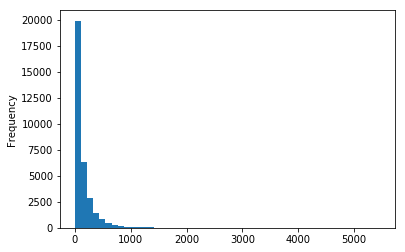

In [10]:
#checking out the overall comment length per review
reviews1['length'].plot(bins=50, kind='hist') 

In [11]:
reviews1.length.describe()

count    32625.000000
mean       144.715709
std        212.362933
min          1.000000
25%         31.000000
50%         77.000000
75%        176.000000
max       5453.000000
Name: length, dtype: float64

In [12]:
#checking out the longest review. Guy has a lot of time on his hands
reviews1[reviews1['length'] == 5453]['Consumer_Text'].iloc[0]

'If you are like me, you have debated buying a home safe for awhile.  You have researched.  Walked by them and tested handles in the store.  Looked at the price.  Then looked at the price again and decided you can wait.  I\'ve done all of that for too many years now and finally decided to go ahead and spend the money and buy one.  I couldn\'t find any that were "affordable" that didn\'t have some kind of poor review.  I think people spend the money, get the safe and realize that what they got was a safe.  And that it\'s not much "fun".That all being said, I am so happy with this SentrySafe!  I sure don\'t like long reviews, but this one will be a little long.  Sorry.  Be sure to check out all of the pictures I attached to the review.  It will help you see the size of this safe and some of the great features you will be getting for your money.The safe arrived in a box with 3 pieces of cushioning material.  One on the bottom and two on the top on each side.  The owner\'s manual and other

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023084B6BF98>,
      dtype=object)

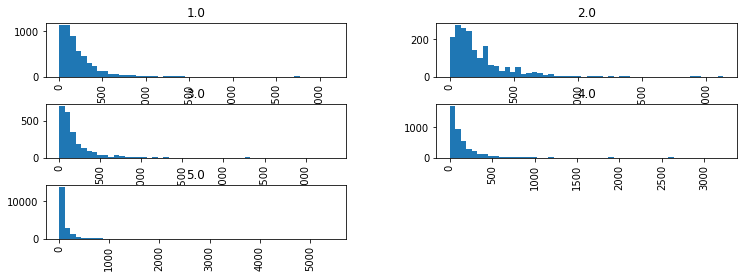

In [13]:
#generating an idea of what the word count is like based on star rating
reviews1.hist(column='length', by='Star_Rating', bins=50,figsize=(12,4))

In [14]:
# how many uniue models there are
len(reviews1['model'].unique())

588

# Create Sub Dataframes based on review and model

In [15]:
#Creating sub dataframe with models that have >= 500 reviews
lrg_review_cnt = reviews1.groupby('model').filter(lambda x: len(x) >= 200)

In [16]:
#how many uniue models there are
len(lrg_review_cnt['model'].unique())

50

In [17]:
lrg_review_cnt.shape

(20491, 9)

In [18]:
#bad reviews
reviews_joined_bad = lrg_review_cnt[lrg_review_cnt['Star_Rating'] < 4]
reviews_joined_bad = reviews_joined_bad.groupby(['model']).agg({'Consumer_Text': lambda x: ' '.join(map(str,x))}).reset_index()
#bi_lem_comb_bad, tri_lem_comb_bad = len_comb_generator(reviews_joined_bad[0:8])

In [19]:
#good reviews
reviews_joined_good = lrg_review_cnt[lrg_review_cnt['Star_Rating'] >= 4]
reviews_joined_good = reviews_joined_bad.groupby(['model']).agg({'Consumer_Text': lambda x: ' '.join(map(str,x))}).reset_index()
#bi_lem_comb_good, tri_lem_comb_good = len_comb_generator(reviews_joined_good)

# NLP (By The Prodigious Peter Himself)

In [20]:
import re
import nltk
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
import spacy
nlp = spacy.load('en')

In [22]:
# Update puncuation list in spacy
nlp.vocab["$"].is_punct = True
nlp.vocab["|"].is_punct = True
nlp.vocab["+"].is_punct = True
nlp.vocab["<"].is_punct = True
nlp.vocab[">"].is_punct = True
nlp.vocab["="].is_punct = True
nlp.vocab["^"].is_punct = True
nlp.vocab["`"].is_punct = True
nlp.vocab["~"].is_punct = True

# Update word list in spacy
nlp.vocab["lock"].is_stop = True
nlp.vocab["Lock"].is_stop = True
nlp.vocab["safe"].is_stop = True
nlp.vocab["Safe"].is_stop = True
nlp.vocab["are"].is_stop = True
nlp.vocab["am"].is_stop = True
nlp.vocab["is"].is_stop = True
nlp.vocab["locks"].is_stop = True
nlp.vocab["time"].is_stop = True
nlp.vocab["Time"].is_stop = True
nlp.vocab["Sentry"].is_stop = True
nlp.vocab["sentry"].is_stop = True
nlp.vocab["Product"].is_stop = True
nlp.vocab["product"].is_stop = True
nlp.vocab["master"].is_stop = True
nlp.vocab["Master"].is_stop = True
nlp.vocab["luggage"].is_stop = True
nlp.vocab["padlock"].is_stop = True
# nlp.vocab["need"].is_stop = True
# nlp.vocab["needs"].is_stop = True
# nlp.vocab["use"].is_stop = True
# nlp.vocab["uses"].is_stop = True
# nlp.vocab["come"].is_stop = True
# nlp.vocab["comes"].is_stop = True

In [23]:
def process_txt(token):
    return token.is_punct or token.is_space or token.is_stop or token.like_num

In [24]:
# function to take array of articles and turn them into nested list of tokens
def lemmatize_txt(array):
    lemma = []
    
    for doc in nlp.pipe(array, batch_size=50,
                        n_threads=-1):
        if doc.is_parsed:
            lemma.append([n.lemma_ for n in doc if not process_txt(n)])
        
        else:
            lemma.append(None)
    
    return lemma

In [25]:
# function to recombine nested list of tokens into full articles 
def lemma_combine(lis):
    parsed_articles = []
    
    for i in range(len(lis)):
        concat_art = ' '.join(lis[i])
        parsed_articles.append(concat_art)
    
    return parsed_articles

In [26]:
review_txt = lrg_review_cnt.Consumer_Text.values

# Text processing

In [27]:
import gensim
from gensim.models import Phrases
from gensim.models.phrases import Phraser

C:\Users\Stephen\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [28]:
import pickle
import time
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
#Example for bi/tri gram is below

In [30]:
%%time

lem = lemmatize_txt(review_txt[:1000])

Wall time: 8.63 s


In [31]:
# Create bi-grams for our text 
phrases = Phrases(lem)
bigram = Phraser(phrases)
bigram_lem = list(bigram[lem])

In [32]:
# Create tri-grams for our text
phrases2 = Phrases(bigram_lem)
trigram = Phraser(phrases2)
trigram_lem = list(trigram[bigram_lem])

In [33]:
# Recombine full article text for unigrams, bigrams, and trigrams
uni_lem_comb = lemma_combine(lem)
bi_lem_comb = lemma_combine(bigram_lem)
tri_lem_comb = lemma_combine(trigram_lem)

# TF-IDF

In [34]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [35]:
def top_overall_words(text, features, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in ids. '''
    D = text
    D[D < min_tfidf] = 0 # so common words across all documents won't dominate - may remove
    tfidf_mean = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_mean, features, top_n)

In [36]:
def tfidf_generator(lem_comb):
    tfidf = TfidfVectorizer(min_df = 0.001, max_df = 0.75)
    text_tfidf = tfidf.fit_transform(lem_comb)
    dense_text = text_tfidf.todense()
    dense_text2 = np.squeeze(np.asarray(dense_text))
    features = tfidf.get_feature_names()
    return top_overall_words(dense_text2, features)

In [37]:
#creating a master function that does the entire proccess
def len_comb_generator(reviews_dataframe):
    reviews_dataframe = reviews_dataframe.reset_index()
    reviews_dataframe.drop(['index'], axis = 1, inplace = True)
    reviews_text = reviews_dataframe['Consumer_Text'].values
    for idx in range(len(reviews_text)):
        reviews_text[idx] = re.sub(r'@([A-Za-z0-9_]+)', "", str(reviews_text[idx]))
    for idx in range(len(reviews_text)):
        reviews_text[idx] = re.sub(r"(https|http)\S+", "", str(reviews_text[idx]))
    for i in range(len(reviews_text)):
        reviews_text[i]= reviews_text[i].replace('  ', ' ')
    for i in range(len(reviews_text)):
        reviews_text[i]= reviews_text[i].replace('.', '')
    lem = lemmatize_txt(reviews_text)
    phrases = Phrases(lem)
    bigram = Phraser(phrases)
    bigram_lem = list(bigram[lem])
    phrases2 = Phrases(bigram_lem)
    trigram = Phraser(phrases2)
    #print('='*50)
    #print(trigram[bigram_lem])
    trigram_lem = list(trigram[bigram_lem])
    #print('='*50)
    #print(trigram_lem[0])
    #print(len(trigram_lem))
    common_terms = ['order', 'come', 'be', 'buy', \
                    'place', 'time', '\'s', \
                    'need', 'lock', 'safe', 'box', 'locks'\
                   'time', 'product', 'thank', 'door', \
                   'want', 'know', 'able', 'like', 'x', 's', \
                   'open', 'key', 'sentrysafe', 'fit', \
                   'lose', 'way', 'work', 'barska',\
                   'look', 'include', 'hold', 'store', \
                   'pick', 'review', 'u', 'code', \
                   'close', 'turn', 'true', 'tell', 'etc', \
                   'find', 'people', 'think', 'try', \
                   'hour', 'day', 'right', 'read', \
                   'easy', 'number', 'difference', 'case', \
                   'regular', 'enter', 'new', 'amazon', \
                   'number', 'try', 'different', 'opening', \
                    'inside', 'hi', 'help', 'master', \
                   'send', 'mean', 'push', 'dial', 'bar', \
                   'leave', 'end', 'possible', 'hello', \
                   'attach', 'away', 'sure', 'wonder', \
                   'python', 'require', 'access','ok', \
                    'happen', 'ruger', '-PRON-', 'money', \
                    'make', 'this', 'item', 'get', \
                   'save', 'the', 'bill', 'it', 'look', 'book', \
                   'year', 'second', 'picture', 'thing', \
                   'have', 'change', 'gun', 'rifle', 'cash', \
                   'finger', 'go', 'lay', 'take', 'if', \
                   'to', 'good', 'big', 'purchase', 'use', \
                   'not', 'little', 'do', 'seem', 'very', \
                   'add', 'issue', 'handgun', 'file', \
                   'month', 'first', 'week', 'pistol', \
                   'son', 'paragon', 'cut', 'shop', 'instal', \
                   'seller', 'en', 'set', 'as', 'bic', 'amazonbasics', \
                   'pen', 'will', 'pro', 'in', 'test', 'ammo', \
                   'paper', 'set', 'minute', 'spend', 'actually', \
                   'and', 'person', 'old', 'allow', 'keep', \
                   'button', 'realize', '07', 'std', 'successfully', \
                   'gunvault', 'vault', 'say', 'manage', 'wowso', \
                   'anymore', 'unit', 'pm'] 
    
    for i in range(len(bigram_lem)):
        print('='*50)
        print(i)
        bigram_lem[i] = [term for term in bigram_lem[i]
                                if term not in common_terms]
    
    for i in range(len(trigram_lem)):
        trigram_lem[i] = [term for term in trigram_lem[i]
                                if term not in common_terms]
    #print('='*50)
    #print(trigram_lem[0])
    uni_lem_comb = lemma_combine(lem)
    bi_lem_comb = lemma_combine(bigram_lem)
    tri_lem_comb = lemma_combine(trigram_lem)
    return bi_lem_comb, tri_lem_comb

# Visualization

In [38]:
def img_generator(df, title, figname, color= 'red', dpi = 500):
    df.sort_values(by = 'tfidf', ascending=False, inplace = True)
    plt.figure(figsize=(24, 18))
    ax = sns.barplot(x="tfidf", y="feature", data=df, color = color, alpha = 0.7)
    ax.xaxis.label.set_size(44)
    ax.yaxis.label.set_size(44)
    plt.tick_params(axis='both', labelsize=48)
    plt.ylabel('Key Descriptor')
    plt.xlabel('Frequency')
    #plt.xticks(rotation=45)
    plt.title(title, fontsize=36, weight='bold')
    plt.savefig(figname +'.png', bbox_inches='tight', dpi=dpi)
    return ax

In [39]:
#seeing what models we're working with
lrg_review_cnt.groupby('model').count()

,Title,Consumer_Text,Review_OR_Question,Brand,Star_Rating,link,date,length
model,,,,,,,,
1469DAT,203,203,203,203,203,203,203,203
1472DAT,203,203,203,203,203,203,203,203
1480DAT,203,203,203,203,203,203,203,203
1500iD,521,521,521,521,521,521,521,521
178D,511,511,511,511,511,511,511,511
207D,451,451,451,451,451,451,451,451
265DCCSEN,1194,1194,1194,1194,1194,1194,1194,1194
2866DATSC,600,600,600,600,600,600,600,600
377KA,293,293,293,293,293,293,293,293


# SentrySafe Fire and Water Safe, Extra Large Combination Safe, 1.23 Cubic Feet, SFW123CU

In [83]:
samp = reviews1[reviews1['model'] == 'SFW123CU']
samp = samp[samp['Star_Rating'] < 4]
samp = samp[['model', 'Consumer_Text']]
bi_lem_comb_TSA_1_bad, tri_lem_comb_TSA_1_bad = len_comb_generator(samp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88


<Figure size 864x432 with 0 Axes>

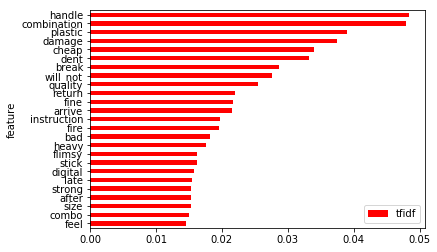

In [84]:
bi_sentry_safe_bad = tfidf_generator(tri_lem_comb_TSA_1_bad)
plt.figure(figsize=(12,6))
bi_sentry_safe_bad.sort_values(by = 'tfidf', ascending=True).plot.barh(x ='feature', color = 'red')

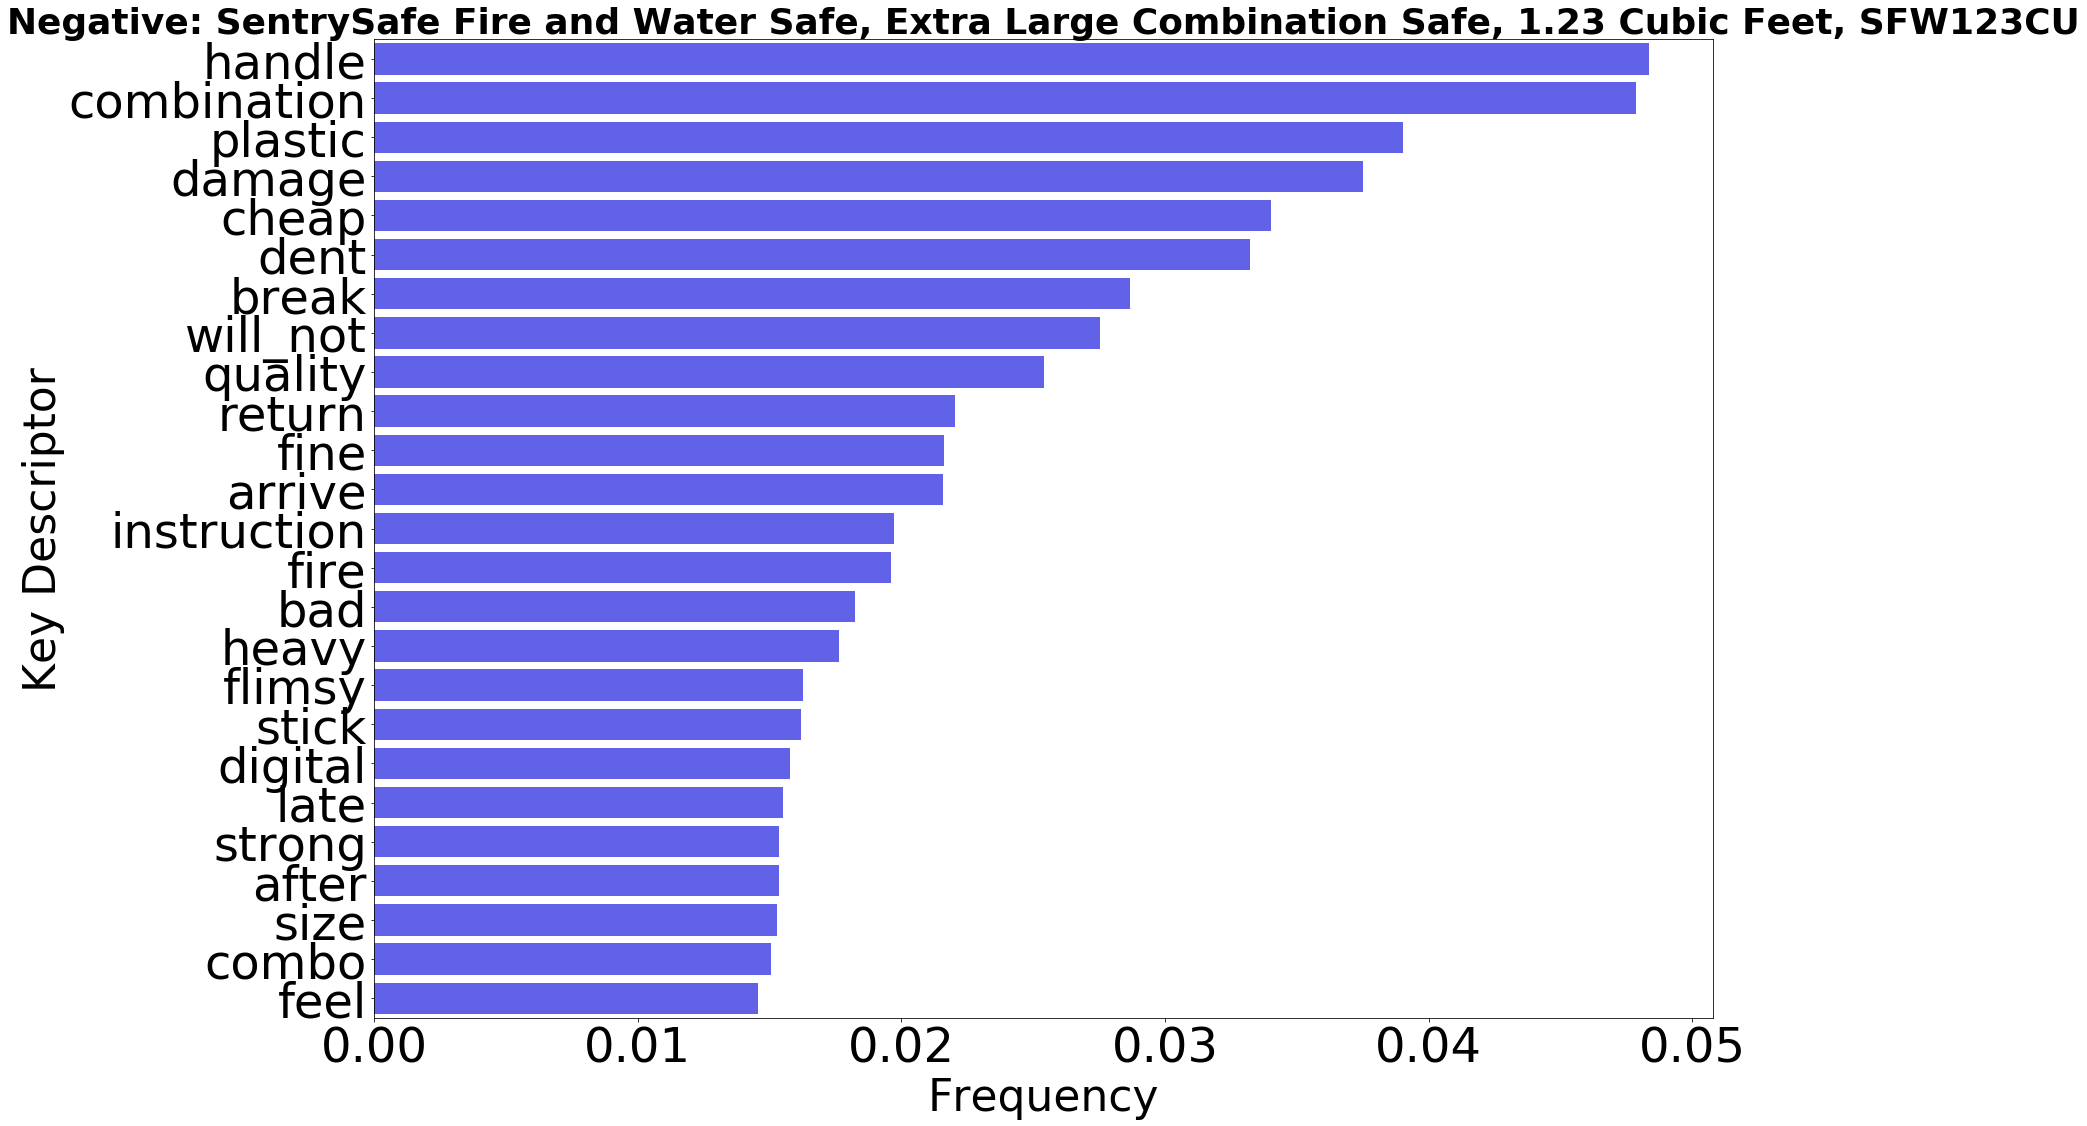

In [85]:
img_generator(bi_sentry_safe_bad, 'Negative: SentrySafe Fire and Water Safe, Extra Large Combination Safe, 1.23 Cubic Feet, SFW123CU', 
             'Paragon_Key_Descriptors_in_Positive_customer_reviews', color = 'blue')

In [65]:
reviews_joined_bad

,model,Consumer_Text
0,1469DAT,Color faded within a couple weeks. I have now ...
1,1472DAT,Just tried to take this off my vehicle for the...
2,1480DAT,as expected...thank you Looks Great. Fits Per...
3,1500iD,DO NOT BUY!!!!! If you mess up your combinati...
4,178D,Been using it for a week and then the lock sto...
5,207D,The magnet Sucks doesn't hold well This is an ...
6,265DCCSEN,After a few months of use it no longer works. ...
7,2866DATSC,Bought with Allen Sports 3-Bike Hitch Mount Ra...
8,377KA,Junk I bought this for my trailer And I have u...
9,378DAT,Too small for my camp trailer If I had known t...


In [66]:
samp = reviews1[reviews1['model'] == 'H0100CG']
samp = samp[samp['Star_Rating'] >= 4]
samp = samp[['model', 'Consumer_Text']]
bi_lem_comb_TSA_1_bad, tri_lem_comb_TSA_1_bad = len_comb_generator(samp)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207


<Figure size 864x432 with 0 Axes>

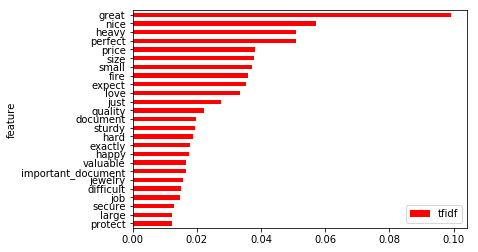

In [67]:
bi_sentry_safe_bad = tfidf_generator(tri_lem_comb_TSA_1_bad)
plt.figure(figsize=(12,6))
bi_sentry_safe_bad.sort_values(by = 'tfidf', ascending=True).plot.barh(x ='feature', color = 'red')

In [88]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Wordcloud formatting

In [86]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

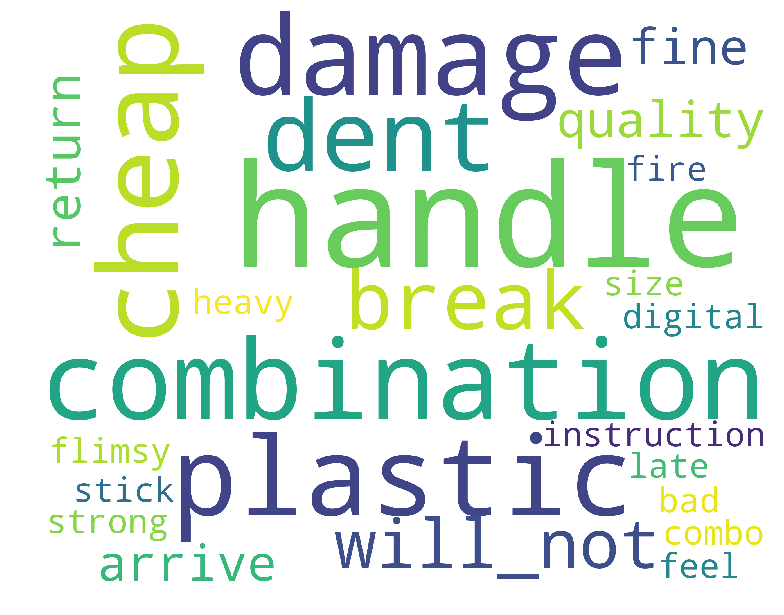

In [89]:
wordcloud_draw(bi_sentry_safe_bad.feature, 'white')

# Sentiment Analysis

In [99]:
from textblob import TextBlob

In [107]:
reviews_sent = lrg_review_cnt[lrg_review_cnt['Star_Rating'] >= 4].loc[lrg_review_cnt['model'] == 'SFW123CU']

In [152]:
review = TextBlob(reviews_sent.iloc[65]['Consumer_Text'])

In [153]:
review.noun_phrases

WordList(["'s job", 'seal material', 'fire prevention envelope', 'cheap protection', 'combination lock'])

In [154]:
review.sentiment

Sentiment(polarity=0.08116809116809118, subjectivity=0.4572079772079772)

In [155]:
for sentence in review.sentences:
    print(sentence + ':  ' + str(sentence.sentiment.polarity) + '\n')

So what can you say about something that just sits there to do it's job :-)  The construction is solid with nothing loose or awkward to use.:  -0.044230769230769226

The 4 bar lock is solid and the bars are long enough to grip well enough to cause prying to be a battle and slow down a thief.:  -0.08425925925925927

It does have the seal material around the door which will swell with heat to block fire and smoke and water in a fire.:  0.0

A word of advise, no matter the safe put anything that can be harmed by water or smoke into a sealed fire prevention envelope inside the safe for extra and cheap protection.:  0.35

The combination lock is not the smoothest but you can dial the combo without a lot of effort.:  0.0

I would recommend this safe for F&F.:  0.5

